In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
tony = cv2.imread("iron-man-tony-stark-uhd-4k-wallpaper-732x412.jpg")
tony = cv2.cvtColor(tony,cv2.COLOR_BGR2RGB)

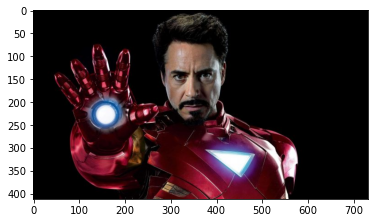

In [3]:
plt.imshow(tony)

In [4]:
face = cv2.imread("unnamed.png")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

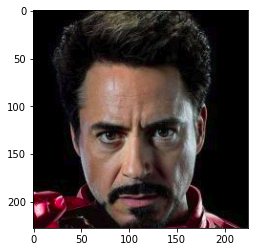

In [5]:
plt.imshow(face)

In [6]:
tony_copy = tony.copy()

In [7]:
result = cv2.matchTemplate(tony_copy,face, cv2.TM_CCOEFF)

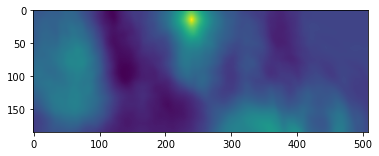

In [8]:
plt.imshow(result)

In [9]:
min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)

In [10]:
top_left = max_loc

In [11]:
face.shape

(228, 225, 3)

In [12]:
height,width,channel = face.shape

In [13]:
bottom_right = (top_left[0]+width , top_left[1]+height)

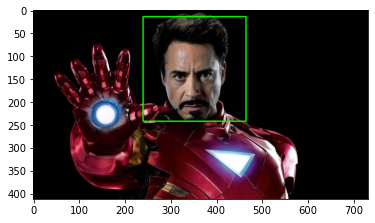

In [14]:
cv2.rectangle(tony_copy,top_left,bottom_right,(0,255,0),2)
plt.imshow(tony_copy)

In [15]:
full_copy = tony.copy()

In [16]:
result_1 = cv2.matchTemplate(full_copy,face,cv2.TM_SQDIFF_NORMED)

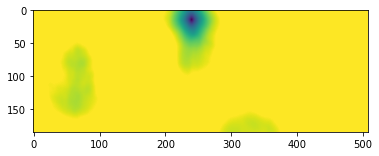

In [17]:
plt.imshow(result_1)

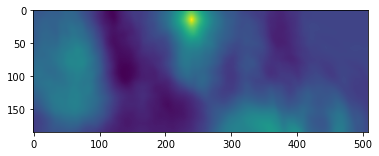

In [18]:
plt.imshow(result)

In [19]:
min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result_1)

In [20]:
top_left = min_loc

In [21]:
bottom_right = (top_left[0]+width , top_left[1]+height)

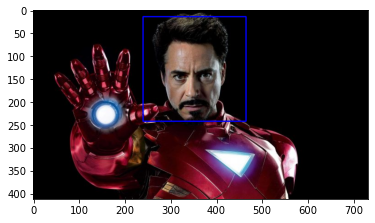

In [22]:
cv2.rectangle(full_copy,top_left,bottom_right,(0,0,255),2)
plt.imshow(full_copy)

# creating using multiple techniques

In [23]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

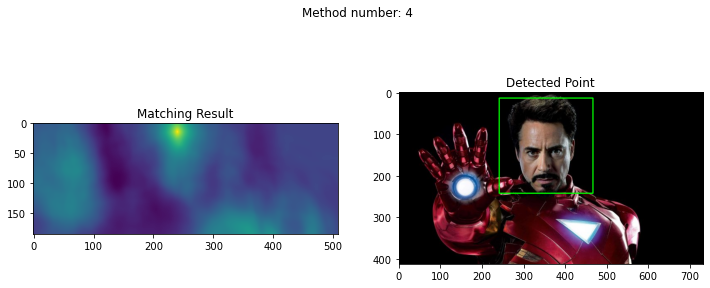

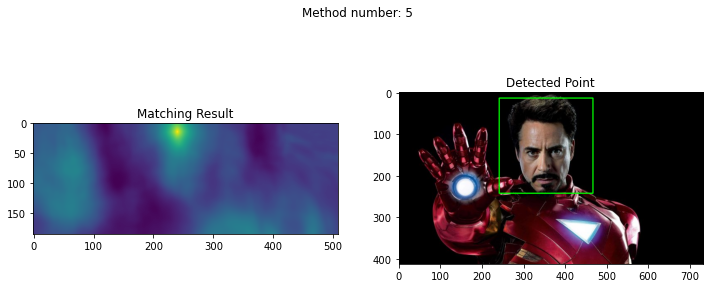

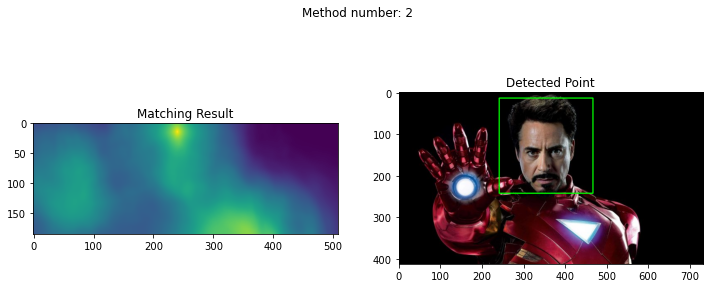

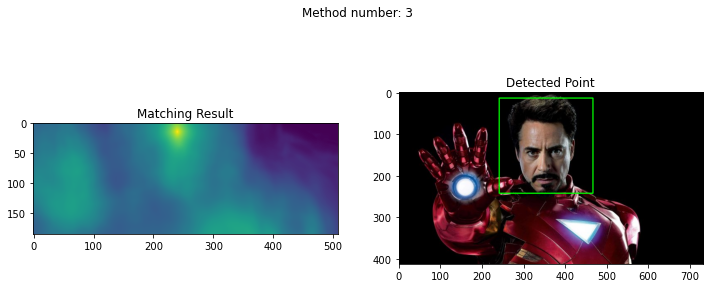

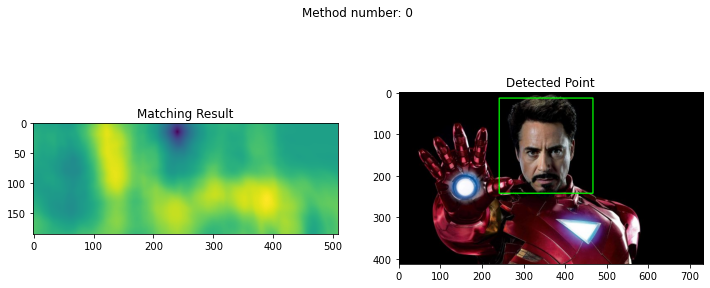

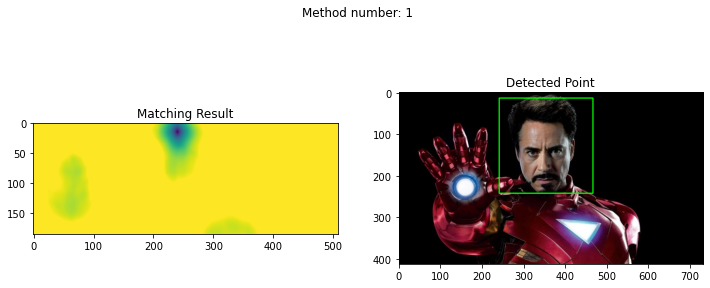

In [24]:
for method in methods:
    img = tony.copy()
    
    
    # Apply template Matching
    result = cv2.matchTemplate(img,face,method)
    
    #Getting minimum value
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    #getiing bottom right co-ordinates    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    #drawing rectangle
    cv2.rectangle(img,top_left, bottom_right, (0,255,0), 2)
    
    
    plt.figure(figsize=(12,5))
    #plotting heat map
    plt.subplot(121),
    plt.imshow(result)
    plt.title('Matching Result')
   
    
    #plotting image
    plt.subplot(122),
    plt.imshow(img)
    plt.title('Detected Point')
    plt.suptitle(f"Method number: {method}")
    plt.show()

# DETECTING MY FACE

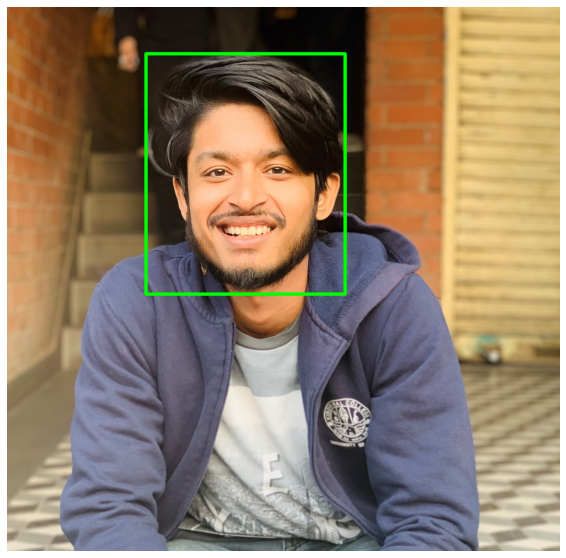

In [25]:
my = cv2.imread("IMG_8904.HEIC")
my = cv2.cvtColor(my,cv2.COLOR_BGR2RGB)

face = cv2.imread("my_face.PNG")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

my_copy = my.copy()

result = cv2.matchTemplate(my_copy,face, cv2.TM_CCOEFF)

min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)

top_left = max_loc

height,width,channel = face.shape

bottom_right = (top_left[0]+width , top_left[1]+height)

cv2.rectangle(my_copy,top_left,bottom_right,(0,255,0),15)

plt.figure(figsize =(10,10))
plt.axis("off")
plt.imshow(my_copy)